# BÀI TẬP THỰC HÀNH LẬP TRÌNH PHÂN TÍCH DỮ LIỆU 1

### BÀI TOÁN PHÂN LỚP: CLASSIFICATION & CLUSTERING

## Bài 1

Import thư viện

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Dựa vào các điểm thi đánh giá năng lực, hãy phán đoán xem sinh viên có định hướng nghề nghiệp hay chưa được định hướng nghề nghiệp
# Input: Logic, NgonNgu, UngXu
# Output: DinhHuong
# DinhHuong = f(Logic, NgonNgu, UngXu)

'''
Ý tưởng tính Z = A0 + A1 + Logic + A2 + NN + A3 + UX + E
Từ đó tính f(x) = 1/(1+e^-z) thuộc [0,1]
Nếu mà f(x) > 0.5 thì YES
Nếu mà f(x) < 0.5 thì NO
'''

'\nÝ tưởng tính Z = A0 + A1 + Logic + A2 + NN + A3 + UX + E\nTừ đó tính f(x) = 1/(1+e^-z) thuộc [0,1]\nNếu mà f(x) > 0.5 thì YES\nNếu mà f(x) < 0.5 thì NO\n'

Đọc dữ liệu từ file csv

In [3]:
df = pd.read_csv('../data/dulieuxettuyendaihoc.csv', header=0, delimiter=',', encoding='utf-8')

Đổi tên cột

In [4]:
df = df[['NGONNGU', 'TOANLOGICPHANTICH', 'GIAIQUYETVANDE', 'DINHHUONGNGHENGHIEP']]
df.rename(columns=
    {
    'TOANLOGICPHANTICH': 'LOGIC',
    'GIAIQUYETVANDE': 'UNGXU',
    'DINHHUONGNGHENGHIEP': 'DINHHUONG'
    }, inplace=True)
df.head(5)

,NGONNGU,LOGIC,UNGXU,DINHHUONG
0,3.25,3.25,4.50,No
1,6.00,4.00,3.50,Yes
2,5.00,6.75,4.00,No
3,4.25,4.25,5.25,No
4,4.25,4.50,5.00,No


In [5]:
dinhhuong = pd.get_dummies(df['DINHHUONG'], drop_first=True)
df.drop(['DINHHUONG'], axis=1, inplace=True)
df = pd.concat([df, dinhhuong], axis=1)
df.head(5)

,NGONNGU,LOGIC,UNGXU,Yes
0,3.25,3.25,4.50,False
1,6.00,4.00,3.50,True
2,5.00,6.75,4.00,False
3,4.25,4.25,5.25,False
4,4.25,4.50,5.00,False


In [6]:
# Biến đổi biến dinhhuong dưới dạng 0 1
# Do biến DINHHUONG là dạng categorical values (định tính) nên cần biến đổi về dạng số (số hóa) trong bài này biến DINHHUONG
# Chỉ có 2 giá trị Yes/No nên ta dễ dàng biến đổi tương ứng 0/1 nhưng nếu như số lượng giá trị nhiều hơn 2 thì ta cần dùng phương pháp One Hot Encoding để biến đổi về dạng 1 vector tương ứng

In [7]:
X = df[['NGONNGU', 'LOGIC', 'UNGXU']].values
y = df[['Yes']].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [9]:
from sklearn.linear_model import LogisticRegression
classifer = LogisticRegression()
classifer.fit(X_train, y_train)

e:\LAP TRINH PYTHON\LT PTDL 1\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [10]:
classifer.coef_

array([[ 0.27976181,  0.05558809, -0.09715109]])

In [11]:
classifer.intercept_

array([-1.15103264])

In [12]:
'''
Phương trình phân lớp
p(x) = 1/(1+e^-z)
Yes = threshold(p(x) so với 0.5)
'''

# Với điểm ngôn ngữ là 7.5, logic là 6.5 và ứng xử là 7.0 thì sinh viên có định hướng hay không
# Đáp án: Yes: ?
# Z = 0.628 (đoạn này thay số trên phương trình)

Z = classifer.intercept_ + classifer.coef_[0][0] * 7.5 + classifer.coef_[0][1] * 6.5 + classifer.coef_[0][2] * 5.0
print(Z)

[0.82274803]


In [13]:
p = -1/(1+np.exp(-Z))
print(p)

if p > 0.5:
    print('Yes')
else:
    print('No')

[-0.69481936]
No


In [14]:
def classifer_cal (a, b, c):
    Z = classifer.intercept_ + classifer.coef_[0][0] * a + classifer.coef_[0][1] * b + classifer.coef_[0][2] * c
    return 1/(1+np.exp(-Z))

p = classifer_cal(7.6, 6.5, 5.0)
print(p)

if p > 0.5:
    print('Yes')
else:
    print('No')

[0.70071904]
Yes


In [15]:
# Defauly threshold is 0.5

y_pred = classifer.predict(X_test)
y_pred

array([False,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
        True, False, False])

In [16]:
'''
hanging threshold and predicting
print('Prediction with threshold 0.9: ')
y_pred_new_threshold = (classifer.predict_proba(X_test)[:, 1] >= 0.9).astype(int)
print(y_pred_new_threshold)
'''

print('Prediction with threshold 0.9: ')
y_pred_new_threshold = (classifer.predict_proba(X_test)[:, 1] >= 0.9).astype(int)
print(y_pred_new_threshold)

Prediction with threshold 0.9: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
result = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten().astype(int), 'Predicted': y_pred.astype(int)})
result.head(10)

,Actual,Predicted
0,True,0
1,True,1
2,True,0
3,False,0
4,True,0
5,True,0
6,True,0
7,False,0
8,True,0
9,False,0


In [18]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

'''
[[IN, FP], [FN, TP]]
'''

'\n[[IN, FP], [FN, TP]]\n'

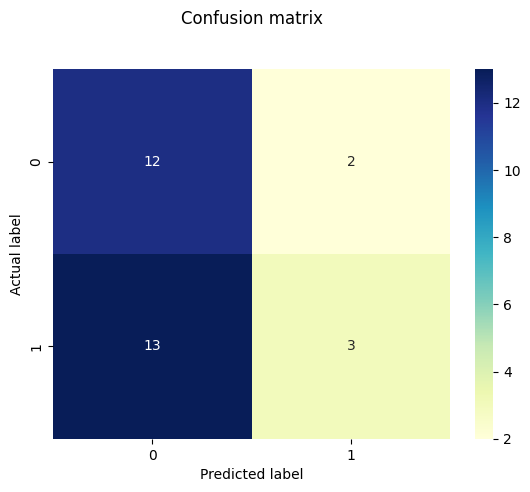

In [19]:
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5

In [21]:
target_names = ['Not oriented', 'Oriented']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Not oriented       0.48      0.86      0.62        14
    Oriented       0.60      0.19      0.29        16

    accuracy                           0.50        30
   macro avg       0.54      0.52      0.45        30
weighted avg       0.54      0.50      0.44        30

